In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## 범주형 자료 인코딩

In [4]:
# 성별을 이진법으로 바꾼다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [5]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [6]:
# 국가명을 원핫인코딩으로 바꿔준다.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## 세트 나누기

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Standard Scaler로 스케일링

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN 구현

초기 설정하기

In [10]:
ann = tf.keras.models.Sequential()

입력층과 은닉층 추가하기

In [11]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

두번째 은닉층 추가하기

In [12]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

출력층 만들기

In [13]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [14]:
# binary_crossentropy: y값이 이진 분류기를 훈련할 때 자주 사용되는 손실 함수
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [15]:
epochs_hist = ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.8298 - accuracy: 0.4683
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7885
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7960
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7960
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7968
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8001
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8136
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8253
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8270
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8276

0.85의 정확도가 나왔다.

# 결론

In [18]:
# 프랑스인, 신용평가점수 650, 남자, 35살, 3년 보유, 잔고 6만달러, 2개, 신용카드있음, 활성고객, 연봉 3.7만달러
pred = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 37000]]))
print(pred)
print(pred > 0.5)

1/1 [==============================] - 0s 31ms/step
[[0.05518351]]
[[False]]


5.5% 확률로 은행 중단한다. 즉 하지 않는다는 예측 도출.

[[1522   73]
 [ 208  197]]
0.8595


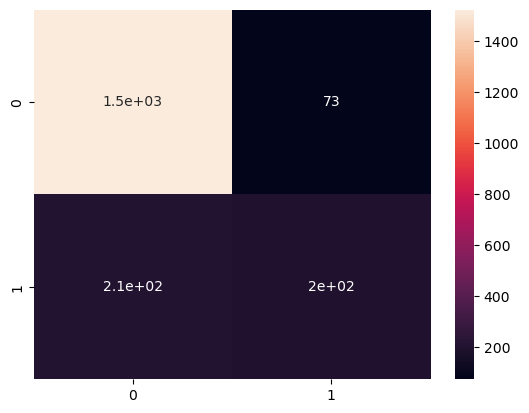

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(cm)
print(accuracy_score(y_test, y_pred))